In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configurations of the plots we will create

# read in the data

df = pd.read_csv('/Users/aliaabdulaziz/Downloads/movies.csv')
# https://www.kaggle.com/datasets/danielgrijalvas/movies

In [2]:
# let's look at the data

df.head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Escape from New York,R,Action,1981,"July 10, 1981 (United States)",7.2,131000.0,John Carpenter,John Carpenter,Kurt Russell,United States,6000000.0,25244626.0,AVCO Embassy Pictures,99.0
96,The Evil Dead,NC-17,Horror,1981,"April 15, 1983 (United States)",7.5,192000.0,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000.0,2956630.0,Renaissance Pictures,85.0
97,Porky's,R,Comedy,1981,"March 19, 1982 (United States)",6.2,40000.0,Bob Clark,Bob Clark,Dan Monahan,Canada,2500000.0,111289673.0,Astral Bellevue Pathé,94.0
98,Blow Out,R,Crime,1981,"July 24, 1981 (United States)",7.4,47000.0,Brian De Palma,Brian De Palma,John Travolta,United States,18000000.0,12000000.0,Filmways Pictures,108.0


In [3]:
# percentage of missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing,4)))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.0003%
score - 0.0004%
votes - 0.0004%
director - 0.0%
writer - 0.0004%
star - 0.0001%
country - 0.0004%
budget - 0.2831%
gross - 0.0246%
company - 0.0022%
runtime - 0.0005%


In [4]:
# data types for each columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# fill in missing data with 0

df[['budget', 'gross', 'votes']] = df[['budget', 'gross', 'votes']].fillna(0)

# change data type for columns 'budget', 'gross', 'votes' to integers

df[['budget', 'gross', 'votes']] = df[['budget', 'gross', 'votes']].astype(int)

In [6]:
# change data type for column 'released' to string

df['released'] = df['released'].astype('str')

In [33]:
# creating correct year column 'year_released' column by taking the year from column 'released'

df['year_released'] = df['released'].astype(str).str.split().str[2]

In [82]:
# creating new column for gross and budget
df['budget_million'] = df['budget']/1000000
df['gross_million'] = df['budget']/1000000

In [81]:
# sorting by highest gross movies

df = df.sort_values(by = ['gross'], inplace=False, ascending=False)

In [52]:
# checking for duplicates and dropping them

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_updates,country_updated
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990,United States,United States
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989,United Kingdom,United Kingdom
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989,Canada,Canada
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990,Hungary,Hungary


In [51]:
# cleaning countries
df['country'].drop_duplicates().sort_values()

# Updating country names
df['country_updated'] = pd.DataFrame(df['country'].replace(
    {'West Germany':'Germany',
     'Soviet Union': 'Russia',
     'Federal Republic of Yugoslavia':'Yugoslavia'
    }))

df['country_updated'].drop_duplicates().sort_values()

4575                Argentina
3419                    Aruba
6643                Australia
2281                  Austria
6560                  Belgium
4053                   Brazil
7245                   Canada
6812                    Chile
7055                    China
4623                 Colombia
5125           Czech Republic
7528                  Denmark
6964                  Finland
7410                   France
5713                  Germany
5487                   Greece
3904                Hong Kong
5994                  Hungary
7360                  Iceland
6917                    India
5914                Indonesia
5903                     Iran
3882                  Ireland
5415                   Israel
3055                    Italy
3354                  Jamaica
3273                    Japan
6545                    Kenya
7302                  Lebanon
49                      Libya
7080                    Malta
491                    Mexico
4892              Netherlands
4245      

Text(0, 0.5, 'Genre')

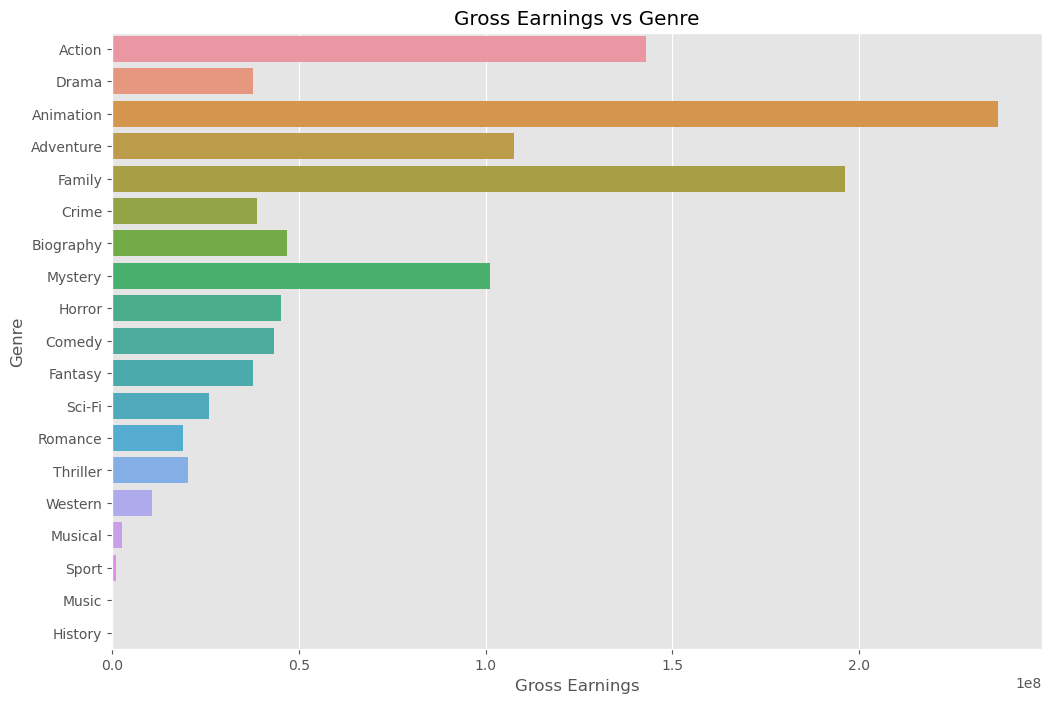

In [140]:
# barplot gross vs genre

sns.barplot(df, x='gross', y='genre', errorbar=None)
plt.title('Gross Earnings vs Genre')
plt.xlabel('Gross Earnings')
plt.ylabel('Genre')

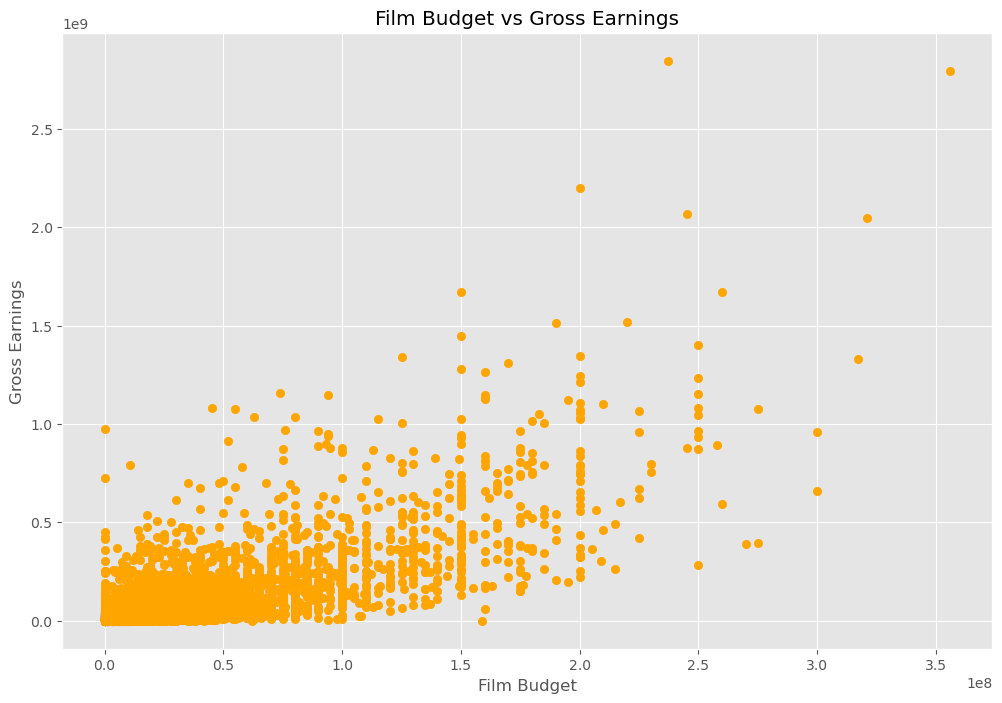

In [138]:
# scatter plot budget vs gross

plt.scatter(x=df['budget'], y=df['gross'], color='orange')
plt.title('Film Budget vs Gross Earnings')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')
plt.show()

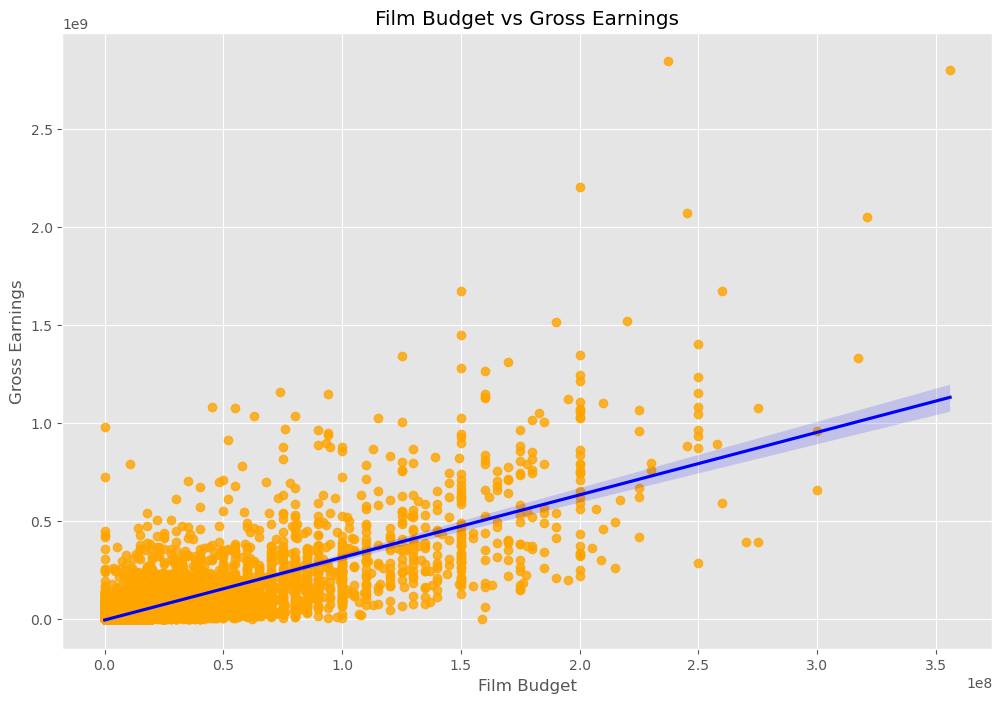

In [139]:
# plot budget vs gross seaborn

sns.regplot(x='budget',
            y='gross',
            data=df,
           scatter_kws={'color': 'orange'},
           line_kws={'color': 'blue'}
           )
plt.title('Film Budget vs Gross Earnings')
plt.xlabel('Film Budget')
plt.ylabel('Gross Earnings')
plt.show()

/Users/aliaabdulaziz/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


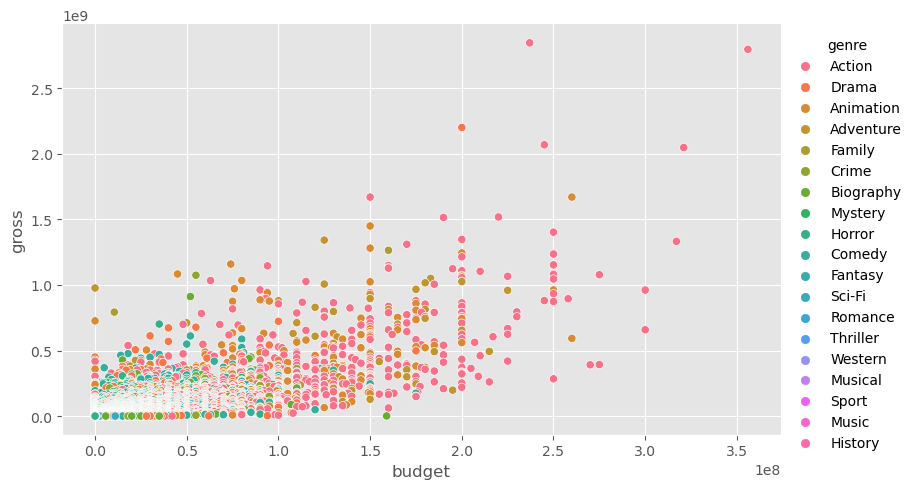

In [137]:
sns.relplot(data=df, x='budget', y='gross', hue='genre', aspect=1.61)
plt.show()

In [17]:
# Let's look at correlation

df.corr(method='pearson', numeric_only=True) #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


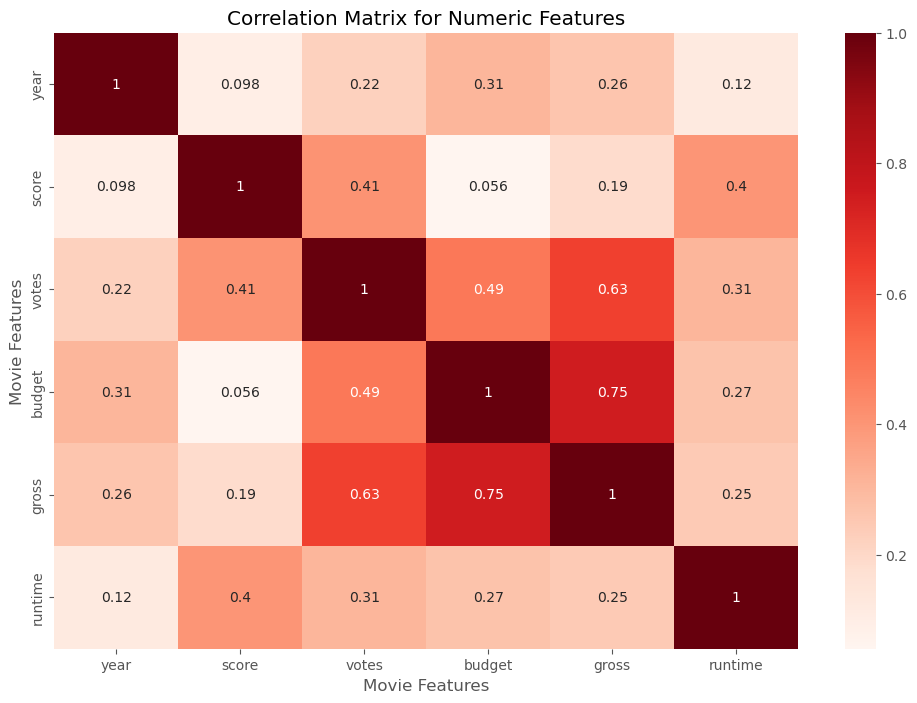

In [21]:
# Heatmap for correlation matrix for numeric features

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap="Reds")
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()